### Jumping straight to data visualization
- Time Series Stretch : From 24th April 2022 to 17th May 2022
- Count : Total data samples: 6712, Outliers: 150, Normal: 6562

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import warnings
warnings. filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 7)

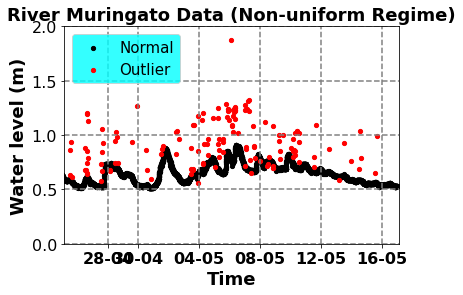

In [2]:
from support import data_visualization_non
df = pd.read_csv('data/non_uniform_regime.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
data = data_visualization_non(df)

### Windowing 
- obtaining quality output by fitting the above dataset as a whole is difficult.
- The data samples can be windowed in order to give a better output.
- the optimal window size is obtained by comparing the perfromance metrics 

##### Histogram 

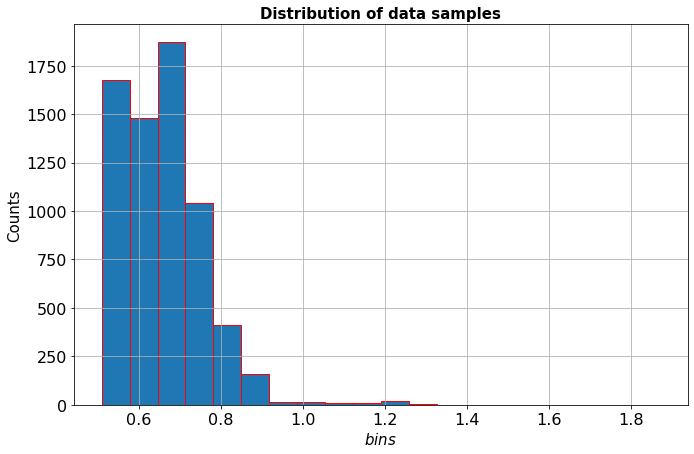

In [3]:
# Lets generate a histogram for the data provided
from support import histogen
histo1 = histogen(df['height'])

##### Bandwidth 

In [4]:
#calculate interquartile range 
data_samples = np.array(df.height)
q3, q1 = np.percentile(data_samples, [75 ,25])
iqr = q3 - q1
# calculate the standard deviation
strd = np.std(data_samples)
# calculate the bandwidth
h_band = 0.9 * min(iqr, strd) * (len(data_samples) ** -0.2) 
h_band

0.015987927516236893

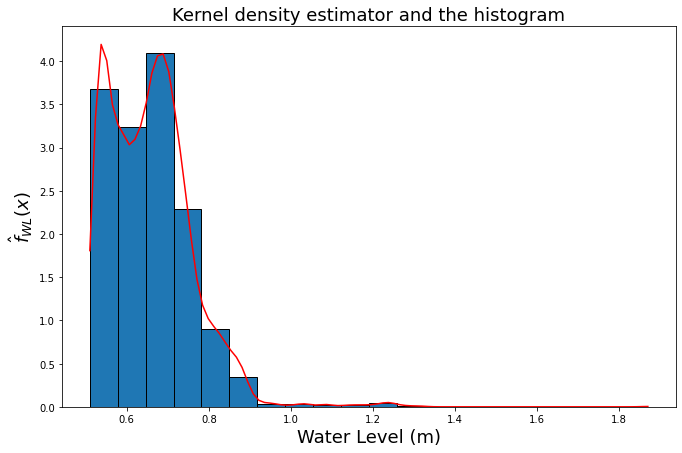

In [5]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel="gaussian", bandwidth = h_band).fit(data_samples.reshape(-1, 1))
data_sample_plot = np.linspace(np.min(data_samples),np.max(data_samples),100)
log_density = kde.score_samples(data_sample_plot.reshape(-1, 1))
plt.hist(data_samples, 20, edgecolor = 'black', density=True);
plt.title('Kernel density estimator and the histogram', fontsize=18)
plt.xlabel('Water Level (m)', fontsize=18)
plt.ylabel(r'$\hat{f}_{WL}(x)$', fontsize=18)
plt.plot(data_sample_plot, np.exp(log_density), color = 'r')

# Windowing the data samples 

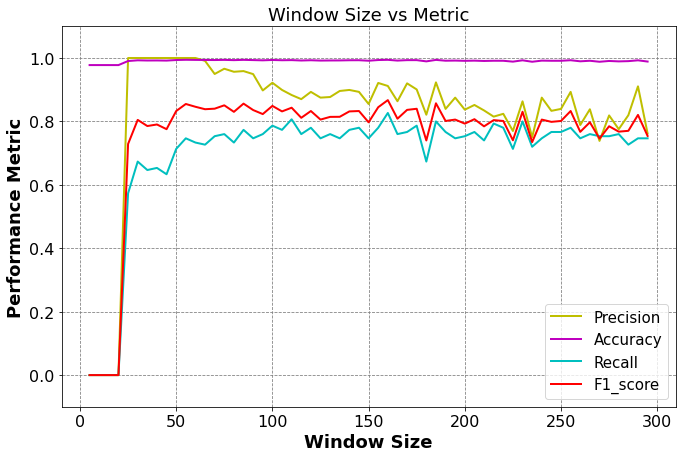

check out window size : 160


In [12]:
from support import window
win = window(df,h_band,300)